In [1]:
import numpy as np
import tensorflow as tf

C:\Users\DELL\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\DELL\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\DELL\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\DELL\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:5

### Data fetching and understand the train/val/test splits.

In [2]:
import h5py
f=h5py.File("SVHN_single_grey1.h5","r+")

In [3]:
for key in f.keys():
    print(key)
    

X_test
X_train
X_val
y_test
y_train
y_val


In [4]:
list(f.keys())
X1 = f['X_test']
y1=f['y_test']
X2 = f['X_train']
y2=f['y_train']
X3=f['X_val']
y3=f['y_val']
df1= np.array(X1.value)
dfy1= np.array(y1.value)
df2= np.array(X2.value)
dfy2= np.array(y2.value)
df3= np.array(X3.value)
dfy3= np.array(y3.value)
print ('X_test shape',df1.shape)
print ('y_test shape',dfy1.shape)
print ('X_train shape',df2.shape)
print ('y_train shape',dfy2.shape)
print ('X_val shape',df3.shape)
print ('y_val shape',dfy3.shape)

C:\Users\DELL\Anaconda3\lib\site-packages\h5py\_hl\dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


X_test shape (18000, 32, 32)
y_test shape (18000,)
X_train shape (42000, 32, 32)
y_train shape (42000,)
X_val shape (60000, 32, 32)
y_val shape (60000,)


### Print shape and some values of label

In [5]:
f['y_train'][1]

6

In [6]:
f['y_train'][0:2]

array([2, 6], dtype=uint8)

### Print images in Train set

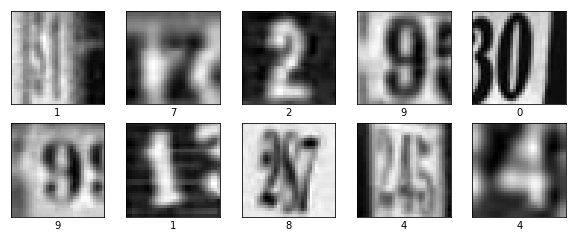

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(df1[i], cmap=plt.cm.binary)
    plt.xlabel(dfy1[i])
plt.show()

### Print images in Test set

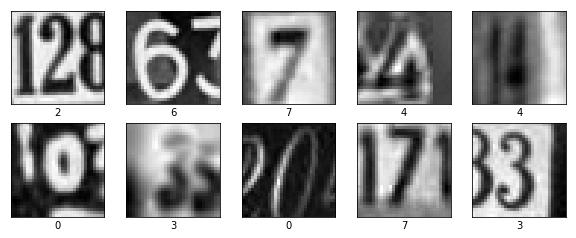

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(df2[i], cmap=plt.cm.binary)
    plt.xlabel(dfy2[i])
plt.show()

### Print images in Validation set

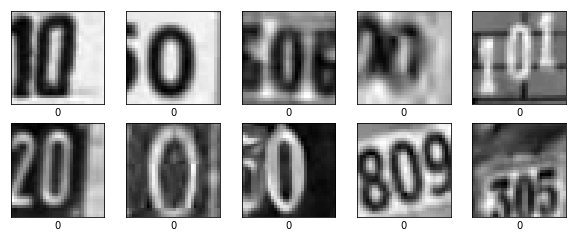

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(df3[i], cmap=plt.cm.binary)
    plt.xlabel(dfy3[i])
plt.show()

### One-hot encode the class vector

In [10]:
trainY = tf.keras.utils.to_categorical(f['y_train'], num_classes=10)
testY = tf.keras.utils.to_categorical(f['y_test'], num_classes=10)
valY = tf.keras.utils.to_categorical(f['y_val'], num_classes=10)

In [11]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:2])

(42000, 10)
First 5 examples now are:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [12]:
print(testY.shape)


(18000, 10)


In [13]:
X_train = df2 / 255
X_test = df1 / 255
X_val= df3 / 255

### Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations)

In [14]:
# Initialize Sequential model
model = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 32,32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

# Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#### Adding more layers to the model with RELU activation

In [15]:
# Hidden layers
model.add(tf.keras.layers.Dense(200, activation='relu', name='Layer_1'))
model.add(tf.keras.layers.Dense(100, activation='relu', name='Layer_2'))
model.add(tf.keras.layers.Dense(60, activation='relu', name='Layer_3'))
model.add(tf.keras.layers.Dense(30, activation='relu', name='Layer_4'))


In [16]:
#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

### Compile the model

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Summarize the model


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
Layer_1 (Dense)              (None, 200)               205000    
_________________________________________________________________
Layer_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
Layer_3 (Dense)              (None, 60)                6060      
_________________________________________________________________
Layer_4 (Dense)              (None, 30)                1830      
_________________________________________________________________
Output (Dense)               (None, 10)                3

### Fit the model on Validation set

In [19]:
Model1 = model.fit(X_train,trainY,          
          validation_data=(X_val,valY),
          epochs=10,
          batch_size=32)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 14s 341us/sample - loss: 1.4250 - accuracy: 0.5244 - val_loss: 1.0058 - val_accuracy: 0.6826
Epoch 2/10
42000/42000 [==============================] - 12s 284us/sample - loss: 0.9974 - accuracy: 0.6845 - val_loss: 0.8020 - val_accuracy: 0.7508
Epoch 3/10
42000/42000 [==============================] - 12s 295us/sample - loss: 0.8622 - accuracy: 0.7265 - val_loss: 0.7132 - val_accuracy: 0.7818
Epoch 4/10
42000/42000 [==============================] - 15s 364us/sample - loss: 0.7867 - accuracy: 0.7527 - val_loss: 0.6337 - val_accuracy: 0.8058
Epoch 5/10
42000/42000 [==============================] - 14s 325us/sample - loss: 0.7244 - accuracy: 0.7692 - val_loss: 0.6173 - val_accuracy: 0.8098
Epoch 6/10
42000/42000 [==============================] - 12s 287us/sample - loss: 0.6935 - accuracy: 0.7802 - val_loss: 0.5674 - val_accuracy: 0.8254
Epoch 7/10
42000/42000 [====================

### Model accuracy and loss for Validation Set

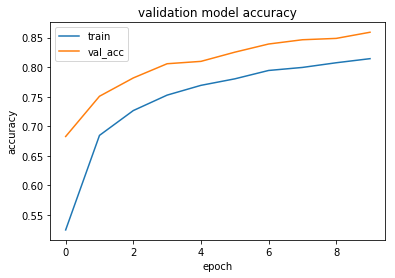

In [20]:
# summarize model for accuracy
plt.plot(Model1.history['accuracy'])
plt.plot(Model1.history['val_accuracy'])
plt.title('validation model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val_acc'], loc='upper left')
plt.show()


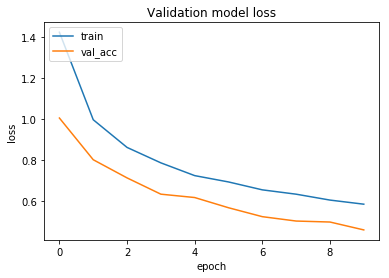

In [21]:
# summarize history for loss
plt.plot(Model1.history['loss'])
plt.plot(Model1.history['val_loss'])
plt.title('Validation model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_acc'], loc='upper left')
plt.show()

In [22]:
# Predicting our Both Models on Test data 
y_pred = model.predict(X_test)

In [23]:
# printing the confusion matrix 
from sklearn.metrics import classification_report,confusion_matrix

test1 = tf.cast(X_test, tf.float32)
print ('\nTest Model Confusion Matrix \n ')
print(confusion_matrix(model.predict_classes(test1), dfy1))


Test Model Confusion Matrix 
 
[[1605   34   24   21   37   19   59   14   53   90]
 [  30 1606   39   53   59   28   30   72   55   37]
 [  11   20 1479   36   23   14   17   41   27   23]
 [  29   24   44 1360   33   90   25   19   45   50]
 [  29   39   31   29 1568   15   64   18   30   30]
 [   7    5   18  107   11 1470   85    9   46   54]
 [  14   14    6   19   18   41 1451   10   93   12]
 [  31   48   97   32   13   15    9 1600   15   28]
 [  17   22   19   33   11   37   69   12 1389   29]
 [  41   16   46   29   39   39   23   13   59 1451]]


#### Build model using Conv2D

In [24]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Reshape
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.metrics import Accuracy

In [25]:
#Initialize model, reshape & normalize data
model2 = Sequential()

#Reshape data from 2D (32,32) to 3D (32, 32, 1)
model2.add(Reshape((32,32,1),input_shape=(32,32,)))

#normalize data
model2.add(BatchNormalization())

#Add first convolutional layer
model2.add(Conv2D(32, #Number of filters 
                                 kernel_size=(5,5), #Size of the filter
                                 activation='relu')) #Size = 32-5+1 = 30

#Add second convolutional layer
model2.add(Conv2D(32, kernel_size=(5,5), activation='relu'))#Size of image = 24



#Flatten the output
model2.add(Flatten())

#Dense layer
model2.add(Dense(128, activation='relu'))

#Output layer
model2.add(Dense(10, activation='softmax'))

In [26]:
model2.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])


In [27]:
#Train the model2
history2 = model2.fit(X_train,trainY,          
          validation_data=(X_val,valY),
          epochs=10,
          batch_size=32)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 186s 4ms/sample - loss: 0.6471 - accuracy: 0.8020 - val_loss: 0.3831 - val_accuracy: 0.8857
Epoch 2/10
42000/42000 [==============================] - 181s 4ms/sample - loss: 0.3629 - accuracy: 0.8930 - val_loss: 0.2995 - val_accuracy: 0.9114
Epoch 3/10
42000/42000 [==============================] - 180s 4ms/sample - loss: 0.2658 - accuracy: 0.9197 - val_loss: 0.2535 - val_accuracy: 0.9269
Epoch 4/10
42000/42000 [==============================] - 185s 4ms/sample - loss: 0.1996 - accuracy: 0.9387 - val_loss: 0.2133 - val_accuracy: 0.9414
Epoch 5/10
42000/42000 [==============================] - 185s 4ms/sample - loss: 0.1484 - accuracy: 0.9531 - val_loss: 0.2164 - val_accuracy: 0.9451
Epoch 6/10
42000/42000 [==============================] - 185s 4ms/sample - loss: 0.1136 - accuracy: 0.9640 - val_loss: 0.2253 - val_accuracy: 0.9468
Epoch 7/10
42000/42000 [==========================

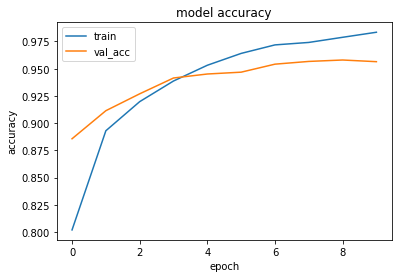

In [28]:
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val_acc'], loc='upper left')
plt.show()

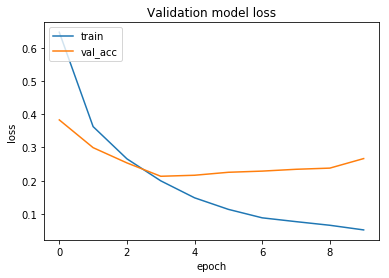

In [29]:
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Validation model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_acc'], loc='upper left')
plt.show()

In [30]:
# printing the confusion matrix 
from sklearn.metrics import classification_report,confusion_matrix

test2 = tf.cast(X_test, tf.float32)
print ('\nTest Model Confusion Matrix \n ')
print(confusion_matrix(model2.predict_classes(test2), dfy1))


Test Model Confusion Matrix 
 
[[1622   21    7   11    7    2   20   14   11   35]
 [  45 1624   22   26   33   21   18   65   23   18]
 [  12   17 1652   24   30   14   13   37   20   43]
 [   6   21   16 1481   10   93   15   14   45   33]
 [  21   43   19   13 1646    7   20   17   13   30]
 [   4    5    8   62   10 1517   34    2   24   35]
 [  43   14    3   21   23   66 1637    9   86   17]
 [  16   52   44   29   19   16   11 1637   21   14]
 [  16   24   17   38   17   22   53    5 1551   39]
 [  29    7   15   14   17   10   11    8   18 1540]]


#### Compile the model on test set

In [32]:
history3 = model2.fit(X_train,trainY,          
          validation_data=(X_test,testY),
          epochs=10,
          batch_size=32)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 155s 4ms/sample - loss: 0.0516 - accuracy: 0.9841 - val_loss: 0.7965 - val_accuracy: 0.8812
Epoch 2/10
42000/42000 [==============================] - 156s 4ms/sample - loss: 0.0458 - accuracy: 0.9848 - val_loss: 0.7987 - val_accuracy: 0.8811
Epoch 3/10
42000/42000 [==============================] - 156s 4ms/sample - loss: 0.0377 - accuracy: 0.9883 - val_loss: 0.8573 - val_accuracy: 0.8828
Epoch 4/10
42000/42000 [==============================] - 155s 4ms/sample - loss: 0.0360 - accuracy: 0.9885 - val_loss: 0.8623 - val_accuracy: 0.8817
Epoch 5/10
42000/42000 [==============================] - 156s 4ms/sample - loss: 0.0319 - accuracy: 0.9901 - val_loss: 0.9127 - val_accuracy: 0.8823
Epoch 6/10
42000/42000 [==============================] - 156s 4ms/sample - loss: 0.0346 - accuracy: 0.9886 - val_loss: 0.9632 - val_accuracy: 0.8705
Epoch 7/10
42000/42000 [==========================

In [34]:
# printing Classification report for model
print("classification report as following: \n")
print(classification_report(model2.predict_classes(test1),dfy1))

classification report as following: 

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1796
           1       0.86      0.90      0.88      1759
           2       0.91      0.89      0.90      1853
           3       0.87      0.81      0.84      1846
           4       0.91      0.90      0.91      1827
           5       0.88      0.87      0.87      1790
           6       0.87      0.90      0.89      1788
           7       0.90      0.92      0.91      1771
           8       0.85      0.88      0.87      1745
           9       0.89      0.88      0.88      1825

   micro avg       0.89      0.89      0.89     18000
   macro avg       0.89      0.89      0.89     18000
weighted avg       0.89      0.89      0.89     18000

